In [38]:
import pandas as pd
import folium
import json
import geopandas
import numpy as np
import pandas as pd
from folium.plugins import MarkerCluster
from geopandas import tools
from shapely.geometry import Point
pd.set_option("display.max_columns",200)


from utils import *

In [2]:
data = pd.read_excel('globalterrorismdb_0718dist.xlsx')
city_description = pd.read_csv('city_population.csv',header=None,names=['city','description','population'])

In [3]:
mask = data.longitude<-360
data.loc[mask,'longitude']=0

In [4]:
mask_month = (data.imonth==0)
mask_day = (data.iday==0)
data.loc[mask_month,'imonth']=1
data.loc[mask_day,'iday']=1
data['concat_date'] = data['iyear'].astype(str)+'-'+data['imonth'].astype(str)+'-'+data['iday'].astype(str)
data['parsed_date'] = pd.to_datetime(data['concat_date'])

In [41]:
data['metadata'] = data['iyear'].astype(str) +' - ' + data['gname'] + ' - ' + data['attacktype1_txt'] + ' - ' + data['targtype1_txt'] + ' - ' + data['weaptype1_txt']
data['year_with_terrorist_name'] = data['iyear'].astype(str) + '-' + data['gname']

In [5]:
locations = data[['latitude','longitude','parsed_date']]
locations['year'] = data['parsed_date'].dt.year
locations_filtered = locations[-((locations['latitude'].isna())|(locations['longitude'].isna()))]
location_points = locations_filtered.values[:,:2].tolist()
location_dates = locations_filtered.values[:,3].astype(str).tolist()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
def plot_attacks_on_map(dataframe,annotation_col,map_theme = 'OpenStreetMap'):
    columns_of_interest = dataframe[['longitude','latitude',annotation_col]]
    columns_of_interest = columns_of_interest[~((columns_of_interest['latitude'].isna()) | (columns_of_interest['longitude'].isna()))]
    map_orgs = folium.Map(location=[56, -3], zoom_start=1,tiles=map_theme)
    MarkerClusterScript(columns_of_interest.to_json(orient="records"), callback=create_marker,popup=annotation_col).add_to(map_orgs)
    return map_orgs

In [68]:
my_map = plot_attacks_on_map(data,'year_with_terrorist_name',map_theme='Stamen Toner')
my_map.save('map_with_annotations.html')

In [7]:
data['resolution'].value_counts()

1998-08-04    18
1988-02-23    11
2005-10-14     8
1994-02-22     8
2010-01-08     8
2003-08-18     7
2008-11-29     7
1989-07-10     6
1997-09-04     6
1987-07-31     5
1988-05-09     5
1988-05-10     5
1997-08-26     4
2010-10-31     4
2004-04-16     4
1997-03-19     4
2010-03-14     4
2011-09-09     4
2008-07-04     4
2007-01-02     3
1997-08-15     3
1988-02-24     3
1997-08-22     3
1976-05-03     3
2008-10-31     3
2000-02-10     3
2006-10-09     3
1989-04-11     3
1970-09-12     3
1995-10-15     3
              ..
1997-10-22     1
2006-05-09     1
1994-09-14     1
2005-01-05     1
1979-03-21     1
1995-11-18     1
1996-11-23     1
2000-11-15     1
2005-06-10     1
1982-01-07     1
1990-07-25     1
2008-10-30     1
1994-07-17     1
1989-05-21     1
2007-08-27     1
2011-08-19     1
2001-11-28     1
2011-01-16     1
1987-01-12     1
1999-07-22     1
1994-05-26     1
1988-01-25     1
1992-01-17     1
2003-12-24     1
1994-04-04     1
2007-12-16     1
1970-03-31     1
1983-05-11    

## Analyze event summaries 

In [18]:
summaries = data.summary.dropna().tolist()
summaries_string = ' '.join(summaries)
words = set(summaries_string)
summaries_words = [w for w in summaries_string if len(w)>2]

In [20]:
from nltk import *
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords.add('.')
stopwords.add(',')
stopwords.add(':')
stopwords.add('(')
stopwords.add(')')
stopwords.add(';')
stopwords.add("'s")
sent_text = nltk.sent_tokenize(summaries_string)
text_tokenized = []
words = []
for sentence in sent_text:
    tokenized_text = nltk.word_tokenize(sentence)
    text_tokenized.append(tokenized_text)
    for i in tokenized_text:
        i = i.lower()
        if i not in stopwords and len(i)>=2:
            words.append(i)

In [23]:
frequencies = FreqDist(words)

In [24]:
frequencies.most_common(50)

[('responsibility', 101731),
 ('claimed', 98415),
 ('group', 85811),
 ('attack', 68083),
 ('incident', 61308),
 ('assailants', 58054),
 ('killed', 51121),
 ('one', 39264),
 ('two', 37442),
 ('detonated', 34744),
 ('injured', 33572),
 ('iraq', 31049),
 ('explosive', 29964),
 ('people', 29606),
 ('police', 29112),
 ('however', 28846),
 ('device', 27747),
 ('city', 25212),
 ('province', 24896),
 ('blast', 24187),
 ('district', 23445),
 ('reported', 22028),
 ('sources', 21961),
 ('casualties', 21638),
 ('least', 21612),
 ('attributed', 20963),
 ('three', 20899),
 ('near', 20035),
 ('fire', 19844),
 ('attacks', 19664),
 ('unknown', 19396),
 ('area', 19391),
 ('governorate', 16270),
 ('attacked', 16085),
 ('state', 15221),
 ('vehicle', 14935),
 ('pakistan', 14597),
 ('wounded', 13563),
 ('opened', 13522),
 ('afghanistan', 12902),
 ('baghdad', 12822),
 ('four', 12677),
 ('bomb', 11661),
 ('soldiers', 11050),
 ('security', 10964),
 ('islamic', 10945),
 ('village', 10861),
 ('forces', 10558),
 

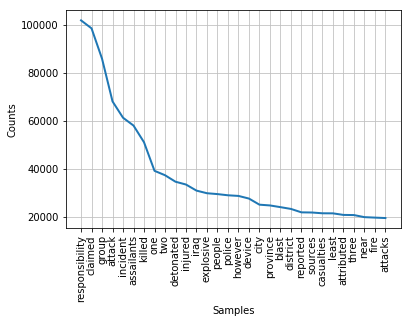

In [25]:
frequencies.plot(30)

## Analyze terrorist activities and locations

In [8]:
import geocoder
def exctract_info_from_api(city):
    g = geocoder.geonames(location=city ,key='craq')
    return [g.description,g.population]

In [12]:
most_common = data.city.value_counts()[data.city.value_counts()>10].index
population_dict = {key:exctract_info_from_api(key) for key in most_common}
city_description = pd.DataFrame.from_dict(data=population_dict, orient='index')

In [17]:
city_description.head(10)

,city,description,population
0,NaN,0,1.0
1,Unknown,seat of a first-order administrative division,206570.0
2,Baghdad,capital of a political entity,7216000.0
3,Karachi,seat of a first-order administrative division,11624219.0
4,Lima,capital of a political entity,7737002.0
5,Mosul,seat of a first-order administrative division,1739800.0
6,Belfast,seat of a first-order administrative division,274770.0
7,Santiago,capital of a political entity,4837295.0
8,Mogadishu,capital of a political entity,2587183.0
9,San Salvador,capital of a political entity,525990.0


In [15]:
city_description.to_csv('city_population.csv')

In [18]:
most_common_terrorists = data.gname.value_counts()[data.gname.value_counts()>100]

In [19]:
taliban = data[data.gname=='Taliban']
isil = data[data.gname=="Islamic State of Iraq and the Levant (ISIL)"]
ira = data[data.gname=='Irish Republican Army (IRA)']
dnr = data[data.gname == "Donetsk People's Republic"]
sh  = data[data.gname == 'Shining Path (SL)']

In [21]:
plot_attacks_on_map(isil,'metadata',map_theme='Stamen Toner')

## Train/test split

In [90]:
common_terrorists_events = data[data.gname.isin(most_common_terrorists.index)]
common_terrorists_events = common_terrorists_events[common_terrorists_events.gname!='Unknown']
common_terrorists_events.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,concat_date,parsed_date,metadata,year_with_terrorist_name
11,197001060001,1970,1,6,NaN,0,NaT,217,United States,1,North America,Colorado,Denver,39.758968,-104.876305,1.0,0,NaN,1/6/1970: Unknown perpetrators threw a Molotov...,1,1,1,1.0,2.0,Other Crime Type,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,4,Military,28.0,Military Recruiting Station/Academy,Army Recruiting Station,"Army Recruiting Station, Denver Colorado",217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-Wing Militants,NaN,NaN,NaN,NaN,NaN,Protest the draft and Vietnam War,0.0,NaN,NaN,0,-99.0,-99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Molotov cocktail,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),305.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN,1970-1-6,1970-01-06,1970 - Left-Wing Militants - Facility/Infrastr...,1970-Left-Wing Militants
13,197001090001,1970,1,9,NaN,0,NaT,217,United States,1,North America,Michigan,Detroit,42.331685,-83.047924,1.0,0,NaN,1/9/1970: Unknown perpetrators set off a fireb...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,U.S. Government housing,Packard Properties building of Detroit Michigan,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-Wing Militants,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,-99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Firebomb,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,Building was damaged,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN,1970-1-9,1970-01-09,1970 - Left-Wing Militants - Facility/Infrastr...,1970-Left-Wing Militants
24,197001190004,1970,1,19,"January 19-20, 1970",0,NaT,217,United States,1,North America,New Jersey,Jersey City,40.717892,-74.067467,1.0,0,Front of building,1/19/1970: Unknown perpetrators ignited a fire...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,2.0,Armed Assault,NaN,NaN,22,Violent Political Party,110.0,Party Office/Facility,Black Panther Party,Headquarters,217.0,United Stat

In [91]:
columns_to_encode = ['gsubname','divert','ransomnote','provstate','city','location',
                     'summary','corp1','target1','corp2','target2','corp3','target3',
                     'gname','motive','weapdetail','propcomment','addnotes','scite1',
                     'scite2','scite3','scite1','dbsource','kidhijcountry']

In [92]:
for column in columns_to_encode:
    common_terrorists_events[column] = common_terrorists_events[column].astype('category')
    common_terrorists_events[column] = common_terrorists_events[column].cat.codes

In [93]:
common_terrorists_events.reset_index(drop=True,inplace=True)

In [94]:
train_indecies = common_terrorists_events.sort_values('eventid', ascending=True)\
        .groupby('gname',group_keys=False)\
        .apply(lambda x: x.head(int(len(x) * 0.8))).index

In [95]:
train_data = common_terrorists_events.iloc[train_indecies]
validation_data = common_terrorists_events.iloc[~common_terrorists_events.index.isin(train_indecies)]

In [96]:
print(train_data.shape,validation_data.shape)

(62435, 139) (15672, 139)


In [97]:
g = train_data.columns.to_series().groupby(train_data.dtypes).groups
groups = {k.name: v for k, v in g.items()}
groups['object']

Index(['approxdate', 'country_txt', 'region_txt', 'alternative_txt',
       'attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt',
       'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'targtype2_txt',
       'targsubtype2_txt', 'natlty2_txt', 'targtype3_txt', 'targsubtype3_txt',
       'natlty3_txt', 'gname2', 'gsubname2', 'gname3', 'gsubname3',
       'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt', 'weaptype1_txt',
       'weapsubtype1_txt', 'weaptype2_txt', 'weapsubtype2_txt',
       'weaptype3_txt', 'weapsubtype3_txt', 'weaptype4_txt',
       'weapsubtype4_txt', 'propextent_txt', 'hostkidoutcome_txt', 'related',
       'concat_date', 'metadata', 'year_with_terrorist_name'],
      dtype='object')

In [98]:
train_data=train_data.drop(['iyear','eventid','approxdate','resolution','related', *groups['object'],'parsed_date',
                            'year_with_terrorist_name','metadata','gsubname','gsubname2',
                            'gsubname3','gname2','gname3'],axis=1)
validation_data= validation_data.drop(['eventid','approxdate','resolution','related', *groups['object'],'parsed_date',
                                       'year_with_terrorist_name','metadata','gsubname','gsubname2',
                                       'gsubname3','gname2','gname3','iyear'],axis=1)

In [99]:
x_train,y_train = train_data.drop(['gname'],axis=1),train_data['gname']
x_val,y_val = validation_data.drop(['gname'],axis=1),validation_data['gname']

In [100]:
from xgboost import XGBClassifier
xgb_clas = XGBClassifier(
    max_depth=4,
    n_estimators =10,
    learning_rate=0.065,
    objective="binary:logistic",
    n_jobs=-1,
    nthread=4,
    subsample=0.85,
    colsample_bytree=0.9,
    colsample_bylevel=0.9,
    tree_method="hist",
    grow_policy="lossguide"
)

In [101]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_clas,x_train,y_train,cv=8,n_jobs=-1,scoring="accuracy",verbose=4)

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[22:14:05] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[22:14:05] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[22:14:05] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[22:14:05] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... , score=0.8127627053878487, total= 1.1min
[CV]  ................................................................
[22:15:11] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... , score=0.8700601099884896, total= 1.1min
[CV]  ................................................................
[22:15:12] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... , score=0.8452608751116214, total= 1.1min
[CV]  ................................................................


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... , score=0.8589858219440542, total= 1.1min
[CV]  ................................................................
[22:15:12] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.


[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:  1.1min remaining:  1.1min


[22:15:13] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... , score=0.8855529894790864, total=  59.9s


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... , score=0.8914888146052969, total= 1.0min


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... , score=0.8885169927909372, total= 1.0min


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... , score=0.8499419878819131, total= 1.0min


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  2.1min finished


In [102]:
xgb_clas.fit(x_train,y_train)

[22:17:11] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
       colsample_bytree=0.9, gamma=0, grow_policy='lossguide',
       learning_rate=0.065, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=-1,
       nthread=4, objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.85, tree_method='hist')

In [103]:
from operator import itemgetter
sorted(list(zip(x_train.columns,xgb_clas.feature_importances_)),key=itemgetter(1),reverse=True)

[('longitude', 0.1312621),
 ('latitude', 0.10696624),
 ('country', 0.08826059),
 ('INT_LOG', 0.059879597),
 ('natlty1', 0.04880671),
 ('provstate', 0.04708665),
 ('region', 0.04321651),
 ('INT_IDEO', 0.032466136),
 ('dbsource', 0.028165985),
 ('weapsubtype1', 0.024510859),
 ('targsubtype1', 0.022790797),
 ('corp1', 0.022145774),
 ('city', 0.021608256),
 ('target1', 0.018275639),
 ('nkill', 0.013437971),
 ('motive', 0.013115459),
 ('nperps', 0.012900451),
 ('summary', 0.01257794),
 ('scite1', 0.012040421),
 ('nwound', 0.011287895),
 ('nperpcap', 0.011072887),
 ('INT_ANY', 0.01085788),
 ('claimmode', 0.010750377),
 ('weapdetail', 0.010642872),
 ('imonth', 0.009352827),
 ('scite2', 0.009245324),
 ('claimed', 0.009030316),
 ('attacktype1', 0.008815308),
 ('iday', 0.008492798),
 ('targtype1', 0.008170286),
 ('specificity', 0.007847775),
 ('nkillus', 0.007847775),
 ('INT_MISC', 0.006235218),
 ('doubtterr', 0.0059127067),
 ('compclaim', 0.005805203),
 ('propvalue', 0.005805203),
 ('location',